In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# import os
# os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle'

In [ ]:
# %cd '/content/gdrive/MyDrive/kaggle'

/content/gdrive/MyDrive/kaggle


In [ ]:
# !ls

kaggle.json


In [ ]:
# !kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

100% 813M/814M [00:05<00:00, 165MB/s]
100% 814M/814M [00:05<00:00, 160MB/s]


In [ ]:
# !mkdir cat_vs_dog
# !mv dogs-vs-cats-redux-kernels-edition.zip cat_vs_dog

In [ ]:
# !ls

cat_vs_dog  kaggle.json


In [ ]:
# %cd cat_vs_dog

/content/gdrive/MyDrive/kaggle/cat_vs_dog


In [ ]:
# !unzip dogs-vs-cats-redux-kernels-edition.zip

Archive:  dogs-vs-cats-redux-kernels-edition.zip
  inflating: sample_submission.csv   
  inflating: test.zip                
  inflating: train.zip               


In [ ]:
# !mkdir train
# !mkdir test

In [ ]:
# !ls

dogs-vs-cats-redux-kernels-edition.zip	test	  train
sample_submission.csv			test.zip  train.zip


In [ ]:
# !mv test.zip test
# !mv train.zip train

In [ ]:
# %cd train

/content/gdrive/MyDrive/kaggle/cat_vs_dog/train


In [ ]:
# !unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

/content/gdrive/MyDrive/kaggle/cat_vs_dog


In [ ]:
# %cd test

/content/gdrive/MyDrive/kaggle/cat_vs_dog/test


In [ ]:
# !unzip test.zip

Streaming output truncated to the last 5000 lines.
  inflating: test/5499.jpg           
  inflating: test/55.jpg             
  inflating: test/550.jpg            
  inflating: test/5500.jpg           
  inflating: test/5501.jpg           
  inflating: test/5502.jpg           
  inflating: test/5503.jpg           
  inflating: test/5504.jpg           
  inflating: test/5505.jpg           
  inflating: test/5506.jpg           
  inflating: test/5507.jpg           
  inflating: test/5508.jpg           
  inflating: test/5509.jpg           
  inflating: test/551.jpg            
  inflating: test/5510.jpg           
  inflating: test/5511.jpg           
  inflating: test/5512.jpg           
  inflating: test/5513.jpg           
  inflating: test/5514.jpg           
  inflating: test/5515.jpg           
  inflating: test/5516.jpg           
  inflating: test/5517.jpg           
  inflating: test/5518.jpg           
  inflating: test/5519.jpg           
  inflating: test/552.jpg            

/content/gdrive/MyDrive/kaggle/cat_vs_dog


(499, 489, 3)


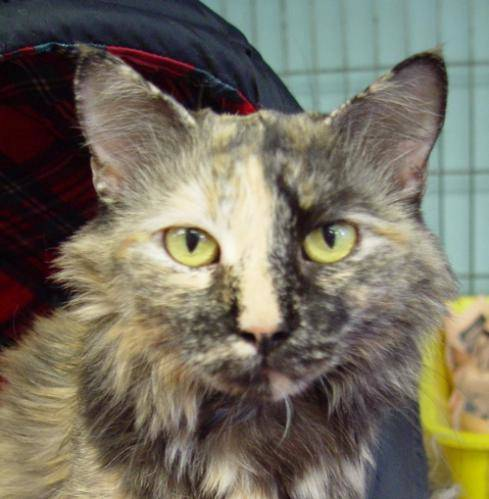

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train/CATS/cat.10.jpg')
print(img.shape)
cv2_imshow(img)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
import shutil
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')


In [ ]:
# %cd '/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train'

/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train


In [ ]:
# !pwd

/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train


In [ ]:
# !mkdir DOGS
# !mkdir CATS

In [ ]:
dir = '/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train'
for fil in os.listdir(dir):
  string = str(fil)
  let = (string[:3])
  if let == 'cat':
    shutil.move(os.path.join(dir,fil), os.path.join(dir,'CATS'))
  elif let == 'dog':
    shutil.move(os.path.join(dir,fil), os.path.join(dir,'DOGS'))


  

#Creating data frame for input and output

In [ ]:
#Actually just go from train

input_path = []
label =[]
dir=r'/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train'

for class_name in os.listdir(dir):
  # print(class_name)
  for path in os.listdir(dir + '/' + class_name):

    if class_name == 'CATS':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join(dir, class_name, path))

In [ ]:
print(input_path[0], label[0])

/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train/DOGS/dog.9139.jpg 1


In [ ]:
print(len(label))
print(len(input_path))

25000
25000


In [ ]:
from collections import Counter
print(Counter(label))

Counter({1: 12500, 0: 12500})


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...      0
1  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...      0
2  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...      1
3  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...      1
4  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...      1

In [ ]:
# df[df['label']==1]['images']

0        /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
5        /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
7        /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
8        /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
9        /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
                               ...                        
24988    /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
24996    /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
24997    /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
24998    /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
24999    /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...
Name: images, Length: 12500, dtype: object

##EXPLORATORY DATA ANALYSIS

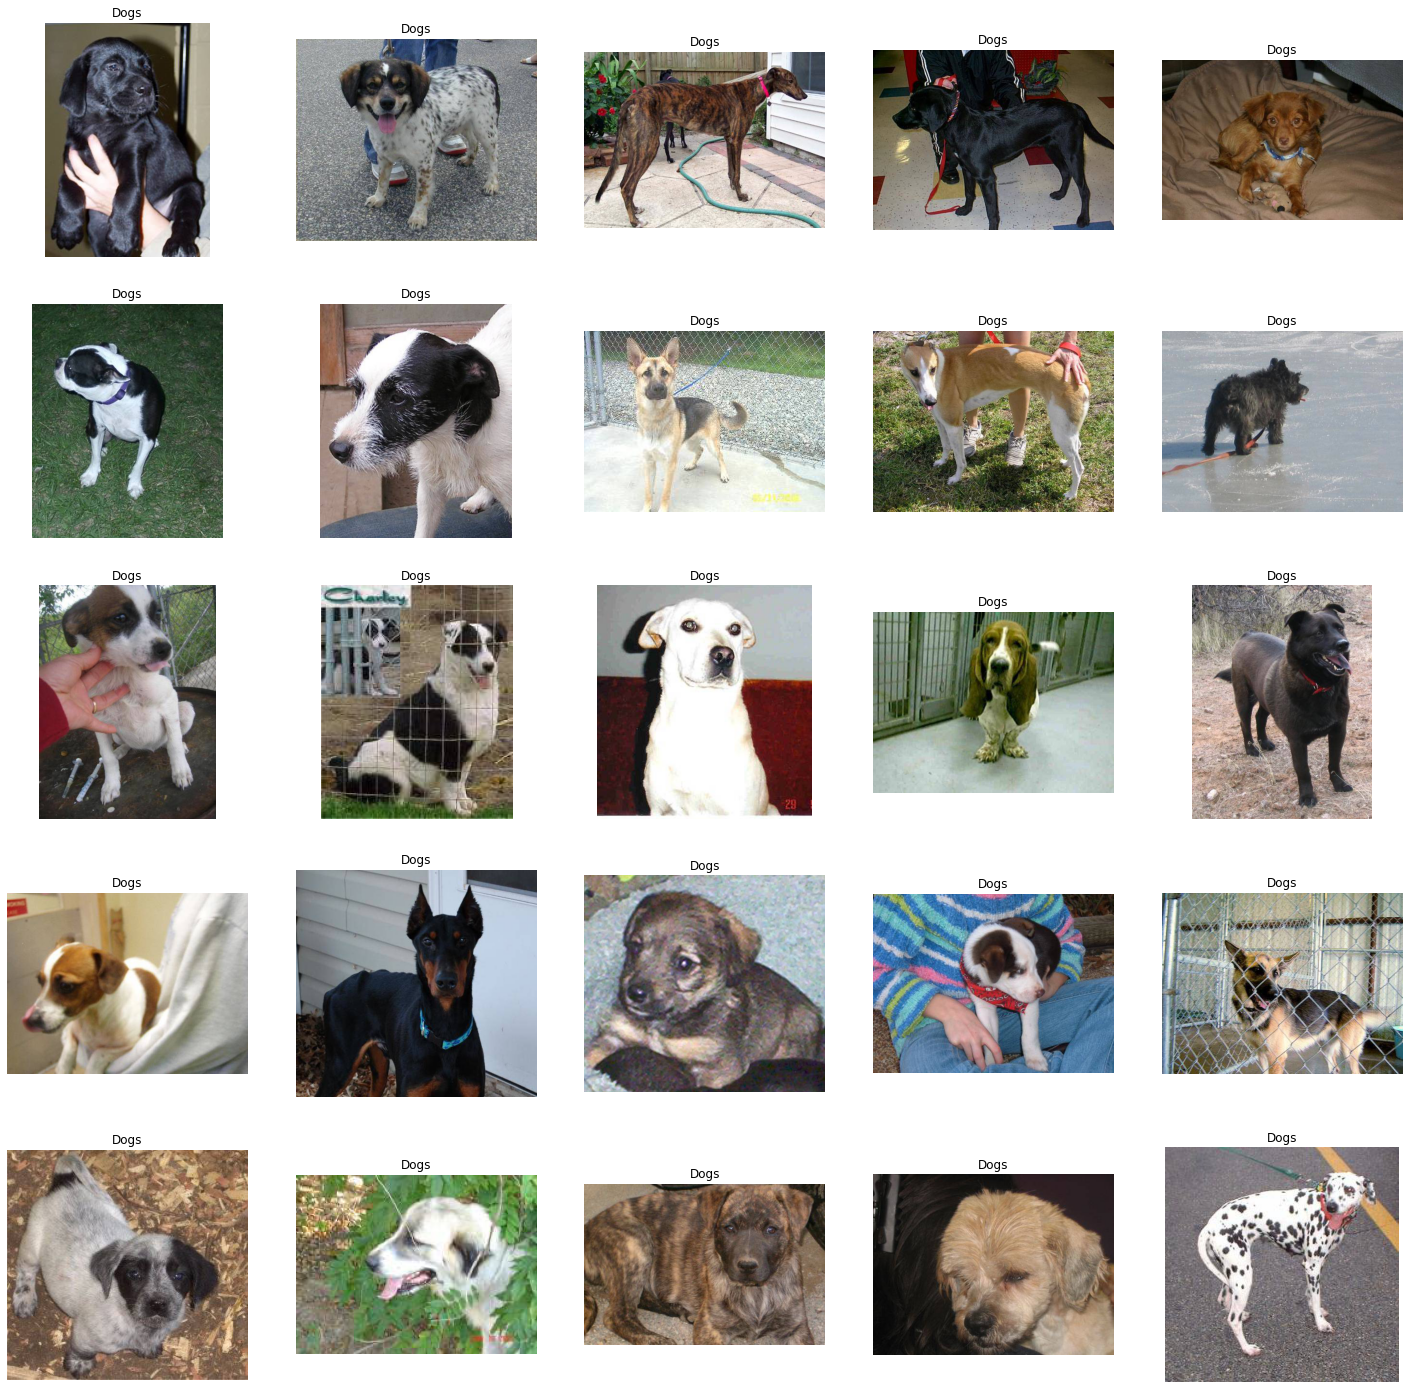

In [ ]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

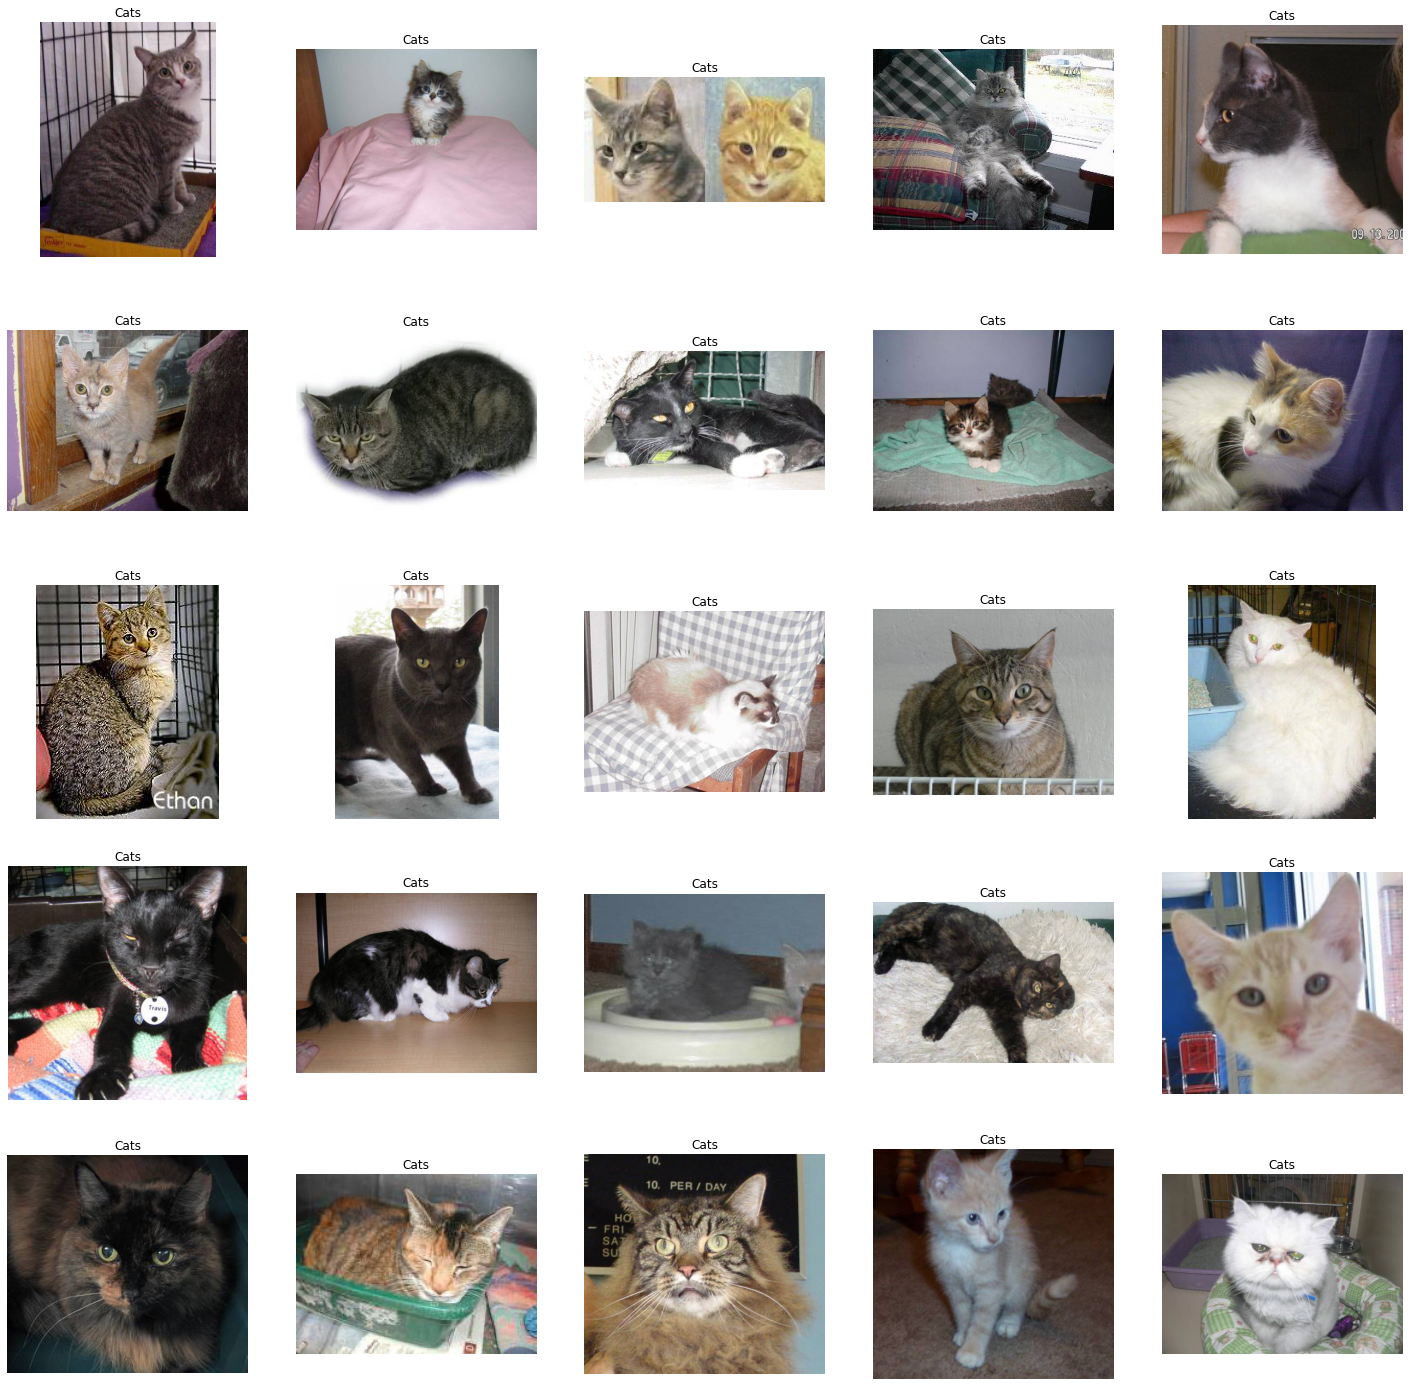

In [ ]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index,file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

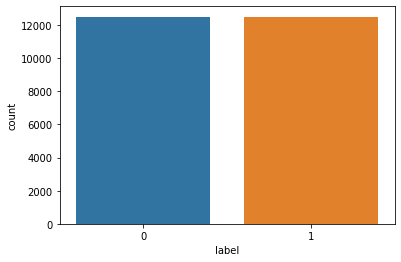

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
#input split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
test.head()

images label
6868   /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...     0
24016  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...     0
9668   /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...     0
13640  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...     1
14018  /content/gdrive/MyDrive/kaggle/cat_vs_dog/trai...     0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale = 1./255 ,    #normalizing the image
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(train, x_col='images', y_col='label',target_size=(128,128),batch_size=512,
                                                     class_mode='binary')

val_iterator = val_generator.flow_from_dataframe(test, x_col='images', y_col='label',target_size=(128,128),batch_size=512,
                                                     class_mode='binary')


Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
train_iterator

##BUILDING THE MODEL

In [ ]:
import tensorflow as tf

from keras import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from keras.layers import BatchNormalization,Dropout
from tensorflow.keras import initializers

initializer = tf.keras.initializers.HeNormal()

model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3), kernel_initializer=initializer))
model.add(MaxPool2D( (2,2) ))

model.add(Conv2D( 32, (3,3), activation='relu' ))
model.add(MaxPool2D( (2,2) ))

model.add(Conv2D( 64, (3,3), activation='relu' ))
model.add(MaxPool2D( (2,2) ))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
history = model.fit(train_iterator, epochs=15, validation_data=val_iterator )

#generator = train_generator

Epoch 1/15
40/40 [==============================] - 1179s 30s/step - loss: 1.1450 - accuracy: 0.5102 - val_loss: 0.6857 - val_accuracy: 0.5816
Epoch 2/15
40/40 [==============================] - 151s 4s/step - loss: 0.6626 - accuracy: 0.6037 - val_loss: 0.6223 - val_accuracy: 0.6564
Epoch 3/15
40/40 [==============================] - 153s 4s/step - loss: 0.6210 - accuracy: 0.6600 - val_loss: 0.5905 - val_accuracy: 0.6834
Epoch 4/15
40/40 [==============================] - 151s 4s/step - loss: 0.6071 - accuracy: 0.6760 - val_loss: 0.5616 - val_accuracy: 0.7154
Epoch 5/15
40/40 [==============================] - 149s 4s/step - loss: 0.5724 - accuracy: 0.7059 - val_loss: 0.5461 - val_accuracy: 0.7260
Epoch 6/15
40/40 [==============================] - 149s 4s/step - loss: 0.5571 - accuracy: 0.7149 - val_loss: 0.5332 - val_accuracy: 0.7324
Epoch 7/15
40/40 [==============================] - 150s 4s/step - loss: 0.5351 - accuracy: 0.7327 - val_loss: 0.6351 - val_accuracy: 0.6314
Epoch 8/15


In [ ]:
path = '/content/gdrive/MyDrive/kaggle/cat_vs_dog/train/train/model1_cnn.h5'

model.save(path)

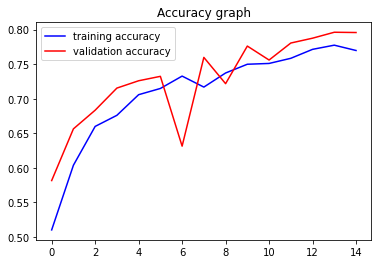

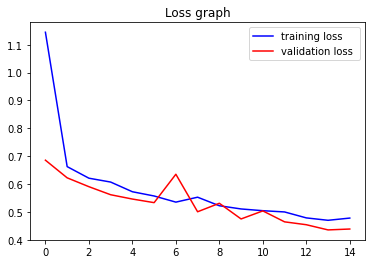

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs,acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'validation accuracy')
plt.title('Accuracy graph')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss, 'b', label = 'training loss')
plt.plot(epochs, val_loss, 'r', label= 'validation loss ')
plt.title('Loss graph')
plt.legend()
plt.show()
